In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [5]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [7]:
import nltk
nltk.download("punkt")
df['text'].apply(len)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yashmittal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5572, dtype: int64

In [8]:
df['num_characters']=df['text'].apply(len)
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [9]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [10]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [11]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for w in text:
        if w.isalnum():
            y.append(w)
    text=y[:]
    y.clear()
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashmittal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df['text']=df['text'].apply(transform_text)

In [13]:
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [14]:
spam_wc=wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

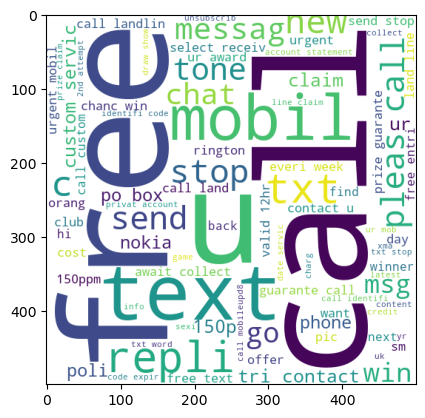

In [15]:
plt.imshow(spam_wc)

In [16]:
ham_wc=wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

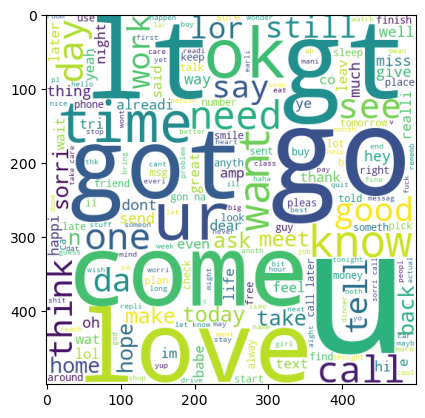

In [17]:
plt.imshow(ham_wc)

In [19]:
import pickle
pickle.dump(df,open('sms.pkl','wb'))